In [2]:
import pandas as pd
data = pd.read_csv('/Users/sun/Desktop/default.csv')

In [1]:
import pandas as pd
data = pd.read_csv('/Users/51310/Desktop/project/default.csv')
data.dtypes
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
LIMIT_AGE = data.iloc[:,1:6]
LIMIT_AGE.head()
PAY = data.iloc[:,6:12]
PAY.head()
BILL = data.iloc[:,12:18]
BILL.head()
PAY_AMT = data.iloc[:,18:24]
PAY_AMT.head()
DEF = data.loc[:,['default payment next month']]
DEF.head()
print(LIMIT_AGE.describe())
print(PAY.describe())
print(BILL.describe())
print(PAY_AMT.describe())
print(DEF.describe())

            LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000
mean    167484.322667      1.603733      1.853133      1.551867     35.485500
std     129747.661567      0.489129      0.790349      0.521970      9.217904
min      10000.000000      1.000000      0.000000      0.000000     21.000000
25%      50000.000000      1.000000      1.000000      1.000000     28.000000
50%     140000.000000      2.000000      2.000000      2.000000     34.000000
75%     240000.000000      2.000000      2.000000      2.000000     41.000000
max    1000000.000000      2.000000      6.000000      3.000000     79.000000
              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139

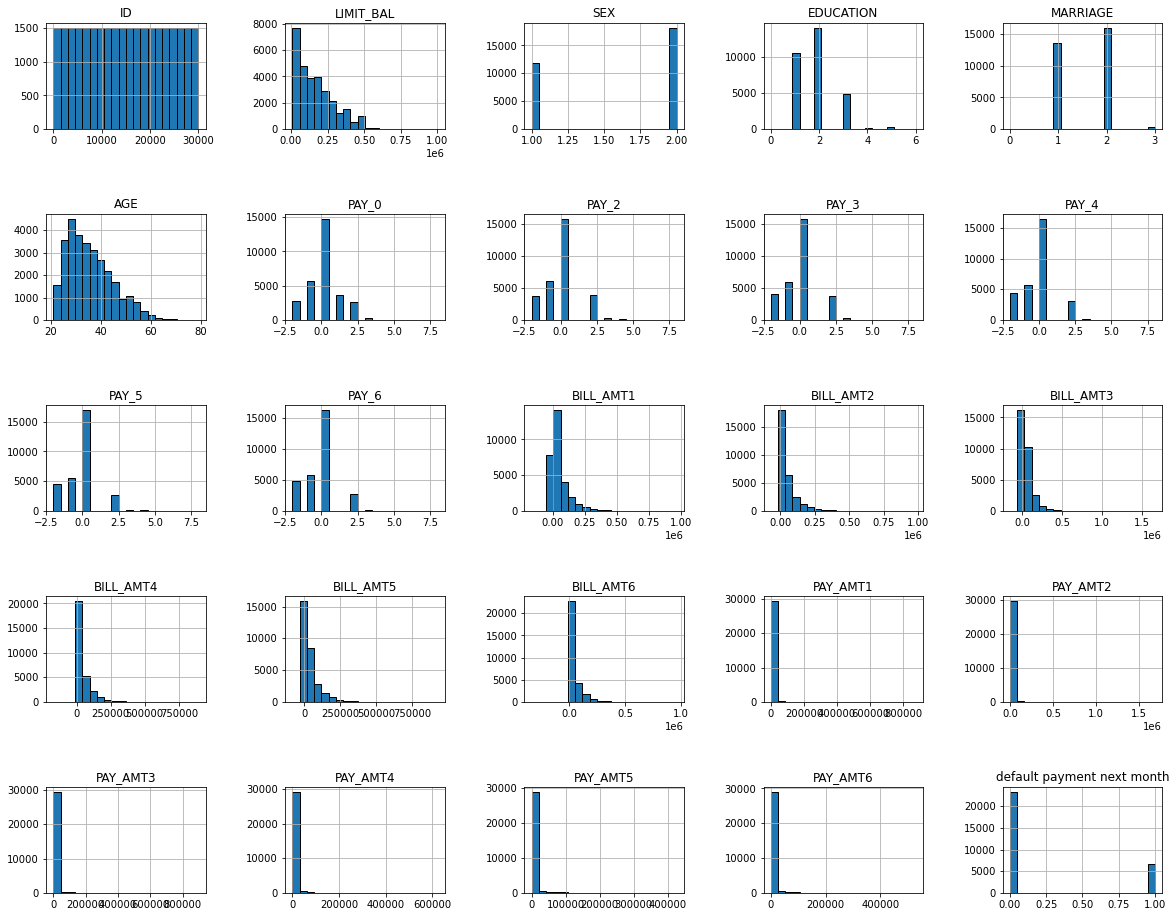

In [3]:
import matplotlib.pyplot as plt

data.hist(figsize=(20, 16), bins=20, edgecolor="black")
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# split data into train and test

In [20]:
Y = data["default payment next month"]
X = data.drop("default payment next month",axis=1)
X = X.drop("ID",axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=999)

# Logit regression 

In [98]:
parameter_all0 = {
    'penalty': ['l1','l2'],
    'C':[0.01,0.1,1,10,100]
}

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression()
Logit_regression = GridSearchCV(Logit, parameter_all0,scoring="accuracy")
Logit_regression.fit(X_train, Y_train)
predicted_Logit_regression = Logit_regression.predict(X_test)

In [100]:
print('Best parameter', Logit_regression.best_params_)
print('accuracy on training set:',Logit_regression.score(X_train,Y_train))
print('accuracy on test set:',Logit_regression.score(X_test,Y_test))

Best parameter {'C': 1, 'penalty': 'l1'}
accuracy on training set: 0.813208333333
accuracy on test set: 0.803833333333


# KNN

In [10]:
parameter_all1 = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
}

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
KNN = GridSearchCV(neigh, parameter_all1,scoring="accuracy")
KNN.fit(X_train, Y_train)
predicted_KNN = KNN.predict(X_test)

In [97]:
print('Best parameter', KNN.best_params_)
print('accuracy on training set:',KNN.score(X_train,Y_train))
print('accuracy on test set:',KNN.score(X_test,Y_test))

Best parameter {'n_neighbors': 14}
accuracy on training set: 0.791
accuracy on test set: 0.770333333333


# naive bayes


In [5]:
from sklearn.naive_bayes import BernoulliNB
Naive_bayes = BernoulliNB()
Naive_bayes.fit(X_train, Y_train)
predicted_Naive_bayes = Naive_bayes.predict(X_test)
print('accuracy on training set:', Naive_bayes.score(X_train,Y_train))
print('accuracy on test set:',Naive_bayes.score(X_test,Y_test))

accuracy on training set: 0.7727083333333333
accuracy on test set: 0.7635


In [31]:
df1=pd.DataFrame({'default':Y_train})
d=pd.concat([X_train,df1],axis=1)

In [33]:
import statsmodels.formula.api as smf
result = smf.logit(formula='default ~ (BILL_AMT1+BILL_AMT2)**2', data=d).fit()    
print(result.summary())  

Optimization terminated successfully.
         Current function value: 0.526120
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23996
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               0.0008958
Time:                        19:27:33   Log-Likelihood:                -12627.
converged:                       True   LL-Null:                       -12638.
Covariance Type:            nonrobust   LLR p-value:                 4.795e-05
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2059      0.021    -57.105      0.000      -1.247      -1.165
BI

# SVM

In [14]:
parameter_all2 = {
    'C':[0.01,0.1,1,10,11,12,13,14,15,16,17,18,19,20]
}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_clf=SVC(random_state=999)
SVM = GridSearchCV(svc_clf, parameter_all2,scoring="accuracy")
SVM.fit(X_train, Y_train)
predicted_svm = SVM.predict(X_test)

In [16]:
print('Best parameter', SVM.best_params_)
print('accuracy on training set:', SVM.score(X_train,Y_train))
print('accuracy on test set:',SVM.score(X_test,Y_test))

Best parameter {'C': 1}
accuracy on training set: 0.993791666667
accuracy on test set: 0.773166666667


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT0 = DecisionTreeClassifier(max_depth=50,random_state=999)
DT0.fit(X_train, Y_train)
predicted_DecisionTree0 = DT0.predict(X_test)
print('accuracy on training set:',DT0.score(X_train,Y_train))
print('accuracy on test set:',DT0.score(X_test,Y_test))

accuracy on training set: 0.999375
accuracy on test set: 0.707333333333


In [18]:
parameter_all3 = {
    'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                  31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
}

In [19]:
DT = DecisionTreeClassifier(random_state=999)
DecisionTree = GridSearchCV(DT, parameter_all3,scoring="accuracy")
DecisionTree.fit(X_train, Y_train)
predicted_DecisionTree = DecisionTree.predict(X_test)
print('Best parameter', DecisionTree.best_params_)
print('accuracy on training set:',DecisionTree.score(X_train,Y_train))
print('accuracy on test set:',DecisionTree.score(X_test,Y_test))

Best parameter {'max_depth': 4}
accuracy on training set: 0.825416666667
accuracy on test set: 0.810333333333


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest0 = RandomForestClassifier(n_estimators=55,max_depth=50,random_state=999)
forest0.fit(X_train, Y_train)
predicted_forest = forest0.predict(X_test)
print('accuracy on training set:',forest0.score(X_train,Y_train))
print('accuracy on test set:',forest0.score(X_test,Y_test))

accuracy on training set: 0.999
accuracy on test set: 0.803833333333


In [21]:
parameter_all4 = {
    'n_estimators': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                  31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55],
    'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                  31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

}


In [22]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5,random_state=999)
RandomForest = GridSearchCV(forest, parameter_all4,scoring="accuracy")
RandomForest.fit(X_train, Y_train)
predicted_randomforest = RandomForest.predict(X_test)
print('Best parameter', RandomForest.best_params_)
print('accuracy on training set:', RandomForest.score(X_train,Y_train))
print('accuracy on test set:', RandomForest.score(X_test,Y_test))

Best parameter {'max_depth': 6, 'n_estimators': 44}
accuracy on training set: 0.828333333333
accuracy on test set: 0.808833333333


# neural network

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [24]:
parameter_all5 = {
    'hidden_layer_sizes': [(4,),(8,),(16,)
                           (4,4),(4,8),(4,16),(8,4),(8,8),(8,16),(16,4),(16,8),(16,16),

                           (4,4,4),(4,4,8),(4,4,16),(4,8,4),(4,8,8),(4,8,16),(4,16,4),(4,16,8),(4,16,16),
                           (8,4,4),(8,4,8),(8,4,16),(8,8,4),(8,8,8),(8,8,16),(8,16,4),(8,16,8),(8,16,16),
                           (16,4,4),(16,4,8),(16,4,16),(16,8,4),(16,8,8),(16,8,16),(16,16,4),(16,16,8),(16,16,16),
                           
                           (4,4,4,4),(4,4,4,8),(4,4,4,16),(4,4,8,4),(4,4,8,8),(4,4,8,16),(4,4,16,4),(4,4,16,8),(4,4,16,16),
                           (4,8,4,4),(4,8,4,8),(4,8,4,16),(4,8,8,4),(4,8,8,8),(4,8,8,16),(4,8,16,4),(4,8,16,8),(4,8,16,16),
                           (4,16,4,4),(4,16,4,8),(4,16,4,16),(4,16,8,4),(4,16,8,8),(4,16,8,16),(4,16,16,4),(4,16,16,8),(4,16,16,16),
                           
                           (8,4,4,4),(8,4,4,8),(8,4,4,16),(8,4,8,4),(8,4,8,8),(8,4,8,16),(8,4,16,4),(8,4,16,8),(8,4,16,16),
                           (8,8,4,4),(8,8,4,8),(8,8,4,16),(8,8,8,4),(8,8,8,8),(8,8,8,16),(8,8,16,4),(8,8,16,8),(8,8,16,16),
                           (8,16,4,4),(8,16,4,8),(8,16,4,16),(8,16,8,4),(8,16,8,8),(8,16,8,16),(8,16,16,4),(8,16,16,8),(8,16,16,16),
                          
                           (16,4,4,4),(16,4,4,8),(16,4,4,16),(16,4,8,4),(16,4,8,8),(16,4,8,16),(16,4,16,4),(16,4,16,8),(16,4,16,16),
                           (16,8,4,4),(16,8,4,8),(16,8,4,16),(16,8,8,4),(16,8,8,8),(16,8,8,16),(16,8,16,4),(16,8,16,8),(16,8,16,16),
                           (16,16,4,4),(16,16,4,8),(16,16,4,16),(16,16,8,4),(16,16,8,8),(16,16,8,16),(16,16,16,4),(16,16,16,8),(16,16,16,16)],
    'learning_rate_init' :  [0.1,0.01,0.001],
    'alpha': [0.001,0.01,0.1],
    'activation' :('identity', 'logistic', 'tanh', 'relu'),
}

In [25]:
MLP = MLPClassifier(random_state=999)
Neural_Network = GridSearchCV(MLP, parameter_all5,scoring="accuracy")
Neural_Network.fit(X_train, Y_train)
predicted_Neural_Network = Neural_Network.predict(X_test_PCA)

In [26]:
print('Best parameter', Neural_Network.best_params_)
print('accuracy on training set:', Neural_Network.score(X_train,Y_train))
print('accuracy on training set:', Neural_Network.score(X_test,Y_test))

Best parameter {'activation': 'identity', 'alpha': 0.001, 'hidden_layer_sizes': (16, 16, 4), 'learning_rate_init': 0.001}
accuracy on training set: 0.777833333333
accuracy on training set: 0.770166666667


# ensemble

In [64]:
import numpy as np
predict_results = pd.DataFrame(columns=('predicted_Logit_regression','predicted_KNN','predicted_Naive_bayes',
                                        'predicted_SVM','predicted_DecisionTree','predicted_forest',
                                        'predicted_Neural_Network','Mode'))
predict_results['predicted_Logit_regression'] =predicted_Logit_regression
predict_results['predicted_KNN'] = predicted_KNN
predict_results['predicted_Naive_bayes'] = predicted_Naive_bayes
predict_results['predicted_SVM'] = predicted_svm
predict_results['predicted_DecisionTree'] = predicted_DecisionTree
predict_results['predicted_forest'] = predicted_forest
predict_results['predicted_Neural_Network'] = predicted_Neural_Network
predict_results['Mode'] = predict_results.mode(axis=1)
predict_results
print('ensemble learning accuracy:',np.mean(predict_results['Mode'].reset_index(drop=True) == Y_test.reset_index(drop=True)) )

ensemble learning accuracy: 0.8005


#  cluster

In [106]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=999).fit(X_train)
predicted_cluster = kmeans.predict(X_test)
np.mean(predicted_cluster == Y_test)

0.69416666666666671

In [162]:
from sklearn.cluster import KMeans
import numpy as np
kmeans1 = KMeans(n_clusters=2, random_state=999).fit(X)
kmeans1.labels_
print(np.mean(kmeans1.labels_ == Y))
print(kmeans1.inertia_)

0.693233333333
8.69482011115e+14


# PCA

In [127]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
XPCA = pca.fit(X)
X_PCA = XPCA.transform(X)

In [131]:
pca.n_components_

4

In [133]:
sum(pca.explained_variance_ratio_)

0.95611172253329957

In [134]:
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(X_PCA, Y, 
                                                    test_size=0.2, 
                                                    random_state=999)

In [164]:
X_PCA

array([[ -1.67374271e+05,  -8.57084119e+04,  -4.16643470e+02,
         -1.01841852e+02],
       [ -1.22158109e+05,   3.54512672e+03,   2.58451743e+03,
         -2.25736973e+03],
       [ -1.00291005e+05,  -3.93530593e+04,  -2.72873922e+03,
         -4.84066638e+03],
       ..., 
       [ -1.38887879e+05,  -8.66696064e+04,   2.65750361e+04,
         -6.25047012e+03],
       [ -3.47567376e+04,  -7.77216534e+04,   2.04228667e+04,
          4.90998742e+04],
       [ -6.39114936e+04,  -1.00573587e+05,  -1.40878332e+04,
          8.42176676e+03]])

# PCA_cluster

In [135]:
from sklearn.cluster import KMeans
import numpy as np
kmeans_PCA = KMeans(n_clusters=2, random_state=999).fit(X_train_PCA)
predicted_cluster_PCA = kmeans_PCA.predict(X_test_PCA)
np.mean(predicted_cluster_PCA == Y_test)

0.69550000000000001

In [167]:
from sklearn.cluster import KMeans
import numpy as np
kmeans1_PCA = KMeans(n_clusters=2, random_state=999).fit(X_PCA)
kmeans1_PCA.labels_
print(np.mean(kmeans1_PCA.labels_ == Y))
print(kmeans1_PCA.inertia_)

0.6932
8.04276334313e+14


# REDUCE

In [72]:
X_reduce = X
X_reduce['pay'] = X_reduce.iloc[:,5:11].sum(axis=1)
X_reduce['bill'] = X_reduce.iloc[:,11:17].sum(axis=1)
X_reduce['bill'] = X_reduce['bill']/6
X_reduce['pay_amt'] = X_reduce.iloc[:,17:23].sum(axis=1)
X_reduce['pay_amt'] = X_reduce['pay_amt']/6
X_reduce = X_reduce.drop("PAY_0",axis=1)
X_reduce = X_reduce.drop("PAY_2",axis=1)
X_reduce = X_reduce.drop("PAY_3",axis=1)
X_reduce = X_reduce.drop("PAY_4",axis=1)
X_reduce = X_reduce.drop("PAY_5",axis=1)
X_reduce = X_reduce.drop("PAY_6",axis=1)
X_reduce = X_reduce.drop("BILL_AMT1",axis=1)
X_reduce = X_reduce.drop("BILL_AMT2",axis=1)
X_reduce = X_reduce.drop("BILL_AMT3",axis=1)
X_reduce = X_reduce.drop("BILL_AMT4",axis=1)
X_reduce = X_reduce.drop("BILL_AMT5",axis=1)
X_reduce = X_reduce.drop("BILL_AMT6",axis=1)
X_reduce = X_reduce.drop("PAY_AMT1",axis=1)
X_reduce = X_reduce.drop("PAY_AMT2",axis=1)
X_reduce = X_reduce.drop("PAY_AMT3",axis=1)
X_reduce = X_reduce.drop("PAY_AMT4",axis=1)
X_reduce = X_reduce.drop("PAY_AMT5",axis=1)
X_reduce = X_reduce.drop("PAY_AMT6",axis=1)
X_reduce


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay,bill,pay_amt
0,20000,2,2,1,24,-2,1284.000000,114.833333
1,120000,2,2,2,26,3,2846.166667,833.333333
2,90000,2,2,2,34,0,16942.166667,1836.333333
3,50000,2,2,1,37,0,38555.666667,1398.000000
4,50000,1,2,1,57,-2,18223.166667,9841.500000
5,50000,1,1,2,37,0,39685.666667,1295.333333
6,500000,1,1,2,29,0,454099.166667,30126.500000
7,100000,2,2,2,23,-3,2247.666667,798.500000
8,140000,2,3,1,28,2,10868.666667,1126.833333
9,20000,1,3,2,35,-10,4486.500000,2354.833333


# reduce cluster

In [169]:
from sklearn.cluster import KMeans
import numpy as np
kmeans1_reduce = KMeans(n_clusters=2, random_state=999).fit(X_reduce)
kmeans1_reduce.labels_
print(np.mean(kmeans1_reduce.labels_ == (1-Y)))
print(kmeans1_reduce.inertia_)

0.563933333333
2.72345347137e+14
